# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [3]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Define variables for columns
City=[]
Lat=[]
Lng=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]

In [6]:
#Define URL for API call
pre_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=Imperial&q="

In [7]:
#Print headings
print("Beginning Data Retrieval")
print("-----------------------------")

#Iterate through cities to retrieve data
r=0
s=1
for city in cities:
    
    try:
            r += 1
            print(f"Processing Record {r} of Set {s} | {city}")
            call = requests.get(pre_url + city).json()
            City.append(call['name'])
            Lat.append(call['coord']['lat'])
            Lng.append(call['coord']['lon'])
            Max_Temp.append(call['main']['temp_max'])            
            Humidity.append(call['main']['humidity'])            
            Cloudiness.append(call['clouds']['all'])
            Wind_Speed.append(call['wind']['speed'])
            Country.append(call['sys']['country'])
            Date.append(call['dt'])
           
    except:
        print("City not found. Skipping...")
            
    if r == 50:
        s += 1
        r = 0
                
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kaeo
Processing Record 2 of Set 1 | yar-sale
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | gat
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | benjamin hill
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | havre-saint-pierre
Processing Record 11 of Set 1 | maningrida
Processing Record 12 of Set 1 | iquitos
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 17 of Set 1 | pokhara
Processing Record 18 of Set 1 | saint anthony
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | buraydah
Processing Record 22 of Se

Processing Record 26 of Set 8 | haines junction
Processing Record 27 of Set 8 | nome
Processing Record 28 of Set 8 | cognac
Processing Record 29 of Set 8 | klyuchi
Processing Record 30 of Set 8 | bambous virieux
Processing Record 31 of Set 8 | kichmengskiy gorodok
Processing Record 32 of Set 8 | tanete
Processing Record 33 of Set 8 | the valley
Processing Record 34 of Set 8 | westport
Processing Record 35 of Set 8 | chakulia
Processing Record 36 of Set 8 | aguimes
Processing Record 37 of Set 8 | banda aceh
Processing Record 38 of Set 8 | itanagar
Processing Record 39 of Set 8 | salalah
Processing Record 40 of Set 8 | kudahuvadhoo
Processing Record 41 of Set 8 | maraa
Processing Record 42 of Set 8 | sokoto
Processing Record 43 of Set 8 | dneprovskaya
Processing Record 44 of Set 8 | southbridge
Processing Record 45 of Set 8 | hobyo
Processing Record 46 of Set 8 | vurnary
Processing Record 47 of Set 8 | ewa beach
Processing Record 48 of Set 8 | assiniboia
Processing Record 49 of Set 8 | a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df=pd.DataFrame({"City":City, "Lat":Lat,"Lng":Lng, "Max Temp": Max_Temp, "Humidity": Humidity, "Cloudiness": Cloudiness, 
                        "Wind Speed": Wind_Speed, "Country": Country, "Date": Date})

weather_csv=weather_df.to_csv("weather.csv", header = True)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaeo,-35.1000,173.7833,69.01,97,100,8.99,NZ,1613272235
1,Yar-Sale,66.8333,70.8333,-29.18,85,5,4.12,RU,1613272492
2,Busselton,-33.6500,115.3333,84.00,41,2,3.00,AU,1613272397
3,Kiryat Gat,31.6100,34.7642,51.01,87,0,2.30,IL,1613272441
4,Rikitea,-23.1203,-134.9692,79.74,75,99,10.54,PF,1613272400


In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,18.732703,17.505861,49.961389,74.712980,54.853748,7.635777,1.613273e+09
std,33.226579,88.261846,31.962376,18.467769,41.386021,5.859020,8.668296e+01
min,-54.800000,-179.166700,-32.010000,18.000000,0.000000,0.400000,1.613272e+09
25%,-9.384050,-56.937100,26.600000,66.000000,2.500000,3.440000,1.613272e+09
50%,22.075200,19.263600,64.000000,79.000000,71.000000,6.130000,1.613273e+09
75%,47.404650,90.003500,74.820000,88.000000,98.000000,10.660000,1.613273e+09
max,78.218600,178.416700,91.400000,100.000000,100.000000,42.570000,1.613273e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#It does not apply because the Humidity max is 100 
#Filter Humidity to find out if there are any cities with humidity greater than 100%
weather_df[weather_df["Humidity"]>100].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  There are no cities that have humidity over 100% only 100% and below.

Int64Index([], dtype='int64')

In [56]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Determine outliers using upper and lower bounds
humidity = weather_df["Humidity"]
lowerq = humidity.quantile(.25)
upperq = humidity.quantile(.75)
IQR = upperq - lowerq
lowerb = lowerq - (1.5*IQR)
upperb = upperq + (1.5*IQR)
clean_city_data = (weather_df[(weather_df["Humidity"] >= lowerb) | (weather_df["Humidity"] <= upperb)])
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaeo,-35.1000,173.7833,69.01,97,100,8.99,NZ,1613272235
1,Yar-Sale,66.8333,70.8333,-29.18,85,5,4.12,RU,1613272492
2,Busselton,-33.6500,115.3333,84.00,41,2,3.00,AU,1613272397
3,Kiryat Gat,31.6100,34.7642,51.01,87,0,2.30,IL,1613272441
4,Rikitea,-23.1203,-134.9692,79.74,75,99,10.54,PF,1613272400


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

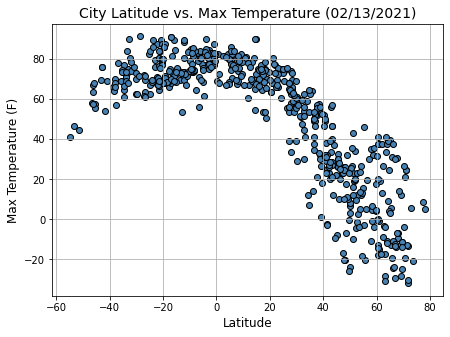

In [157]:
# Generate a scatter plot of Latitude vs. Max Temperature
fig, ax = plt.subplots(1, figsize=(7,5))
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], color= 'steelblue', edgecolors= 'black')
plt.xlabel("Latitude", size=12)
plt.ylabel("Max Temperature (F)", size=12)
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%m/%d/%Y')})", size=14)
ax.grid()
plt.savefig("Latitude vs Temperature")

## Latitude vs. Humidity Plot

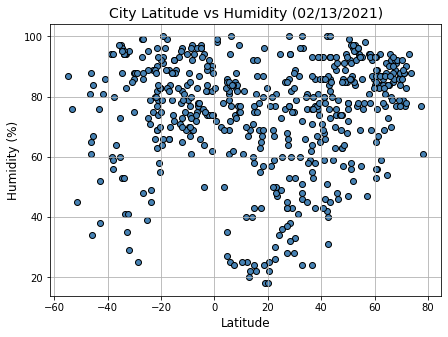

In [142]:
# Generate a scatter plot of Latitude vs. Humidity
fig, ax = plt.subplots(1, figsize=(7,5))
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], color= 'steelblue', edgecolors= 'black')
plt.xlabel("Latitude", size=12)
plt.ylabel("Humidity (%)", size=12)
plt.title(f"City Latitude vs Humidity ({time.strftime('%m/%d/%Y')})", size=14)
ax.grid()
plt.savefig("City Latitude vs Humidity")

## Latitude vs. Cloudiness Plot

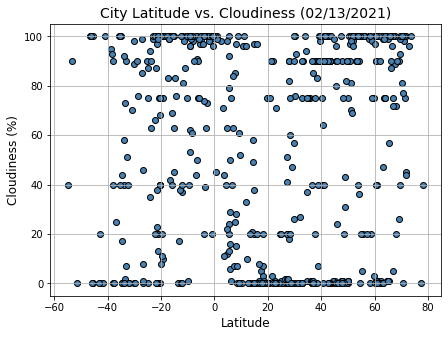

In [144]:
# Generate a scatter plot of Latitude vs. Cloudiness
fig, ax = plt.subplots(1, figsize=(7,5))
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], color= 'steelblue', edgecolors= 'black')
plt.xlabel("Latitude", size=12)
plt.ylabel("Cloudiness (%)", size=12)
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%m/%d/%Y')})", size=14)
ax.grid()
plt.savefig("Latitude vs Cloudiness")

## Latitude vs. Wind Speed Plot

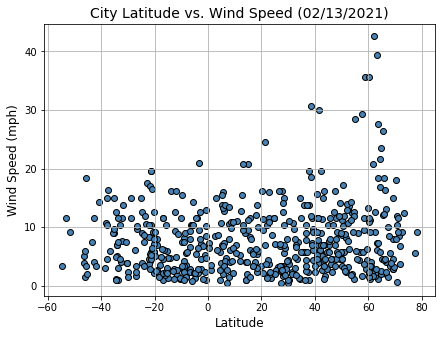

In [146]:
# Generate a scatter plot of Latitude vs. Wind Speed
fig, ax = plt.subplots(1, figsize=(7,5))
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], color= 'steelblue', edgecolors= 'black')
plt.xlabel("Latitude", size=12)
plt.ylabel("Wind Speed (mph)", size=12)
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%m/%d/%Y')})", size=14)
ax.grid()
plt.savefig("Latitude vs Wind Speed")

## Linear Regression

In [154]:
#Grop data by hemisfers
nh=clean_city_data[clean_city_data["Lat"]>=0]
sh=clean_city_data[clean_city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8644196922175011


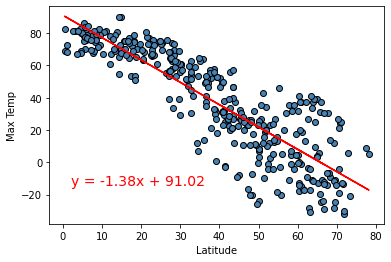

In [236]:
#Plot linear regression for Northern Hemisphere
# Calculate the correlation coefficient 
corr_coef = np.corrcoef(nh["Lat"], nh["Max Temp"])

#Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh["Lat"], nh["Max Temp"])
Lin_reg = (nh["Lat"]) * slope + intercept
print (f"The r-value is: {rvalue}")

#plot scatter
plt.scatter(nh["Lat"], nh["Max Temp"], color= 'steelblue', edgecolors= 'black')
plt.plot((nh["Lat"]), Lin_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#Show regression equation
reg_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(reg_eq, xy=(2,-14), color="r", size=14)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5155634805259363


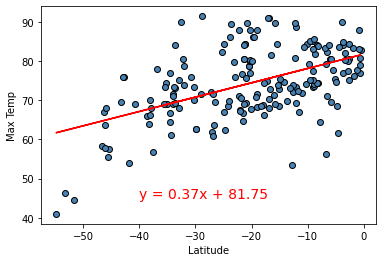

In [237]:
#Plot linear regression for Southern Hemisphere
# Calculate the correlation coefficient 
corr_coef = np.corrcoef(sh["Lat"], sh["Max Temp"])

#Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh["Lat"], sh["Max Temp"])
Lin_reg = (sh["Lat"]) * slope + intercept
print (f"The r-value is: {rvalue}")

#plot scatter
plt.scatter(sh["Lat"], sh["Max Temp"], color= 'steelblue', edgecolors= 'black')
plt.plot((sh["Lat"]), Lin_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#Show regression equation
reg_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(reg_eq, xy=(-40,45), color="r", size=14)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.342396366726391


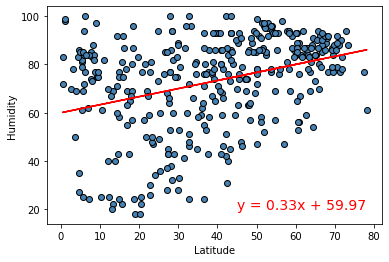

In [238]:
#Plot linear regression for Northern Hemisphere
# Calculate the correlation coefficient
corr_coef = np.corrcoef(nh["Lat"], nh["Humidity"])

#Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh["Lat"], nh["Humidity"])
Lin_reg = (nh["Lat"]) * slope + intercept
print (f"The r-value is: {rvalue}")

#plot scatter
plt.scatter(nh["Lat"], nh["Humidity"], color= 'steelblue', edgecolors= 'black')
plt.plot((nh["Lat"]), Lin_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Show regression equation
reg_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(reg_eq, xy=(45,20), color="r", size=14)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19974880298977912


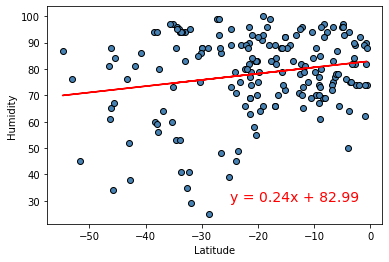

In [239]:
#Plot linear regression for Southern Hemisphere
# Calculate the correlation coefficient
corr_coef = np.corrcoef(sh["Lat"], sh["Humidity"])

#Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh["Lat"], sh["Humidity"])
Lin_reg = (sh["Lat"]) * slope + intercept
print (f"The r-value is: {rvalue}")

#plot scatter
plt.scatter(sh["Lat"], sh["Humidity"], color= 'steelblue', edgecolors= 'black')
plt.plot((sh["Lat"]), Lin_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Show regression equation
reg_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(reg_eq, xy=(-25,30), color="r", size=14)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2993196771187013


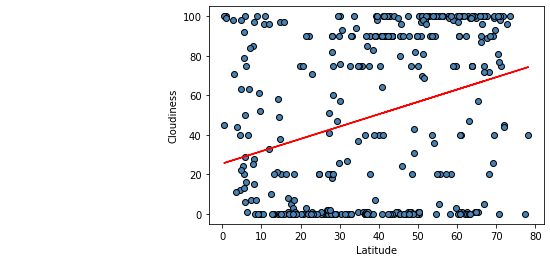

In [240]:
#Plot linear regression for Northern Hemisphere
# Calculate the correlation coefficient
corr_coef = np.corrcoef(nh["Lat"], nh["Cloudiness"])

#Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh["Lat"], nh["Cloudiness"])
Lin_reg = (nh["Lat"]) * slope + intercept
print (f"The r-value is: {rvalue}")

#plot scatter
plt.scatter(nh["Lat"], nh["Cloudiness"], color= 'steelblue', edgecolors= 'black')
plt.plot((nh["Lat"]), Lin_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Show regression equation
reg_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(reg_eq, xy=(-55,70), color="r", size=10)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.34839865559722083


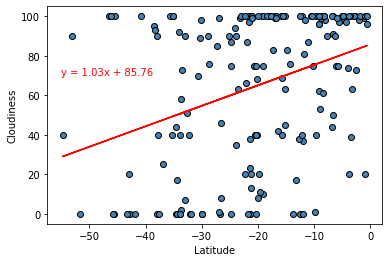

In [241]:
#Plot linear regression for Southern Hemisphere
# Calculate the correlation coefficient
corr_coef = np.corrcoef(sh["Lat"], sh["Cloudiness"])

#Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh["Lat"], sh["Cloudiness"])
Lin_reg = (sh["Lat"]) * slope + intercept
print (f"The r-value is: {rvalue}")

#plot scatter
plt.scatter(sh["Lat"], sh["Cloudiness"], color= 'steelblue', edgecolors= 'black')
plt.plot((sh["Lat"]), Lin_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Show regression equation
reg_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(reg_eq, xy=(-55,70), color="r", size=10)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1286101556151554


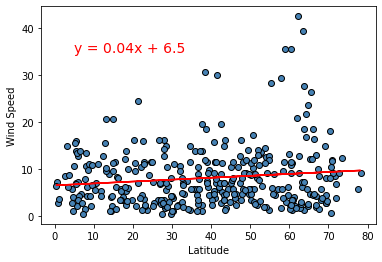

In [235]:
#Plot linear regression for Northern Hemisphere
# Calculate the correlation coefficient
corr_coef = np.corrcoef(nh["Lat"], nh["Wind Speed"])

#Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh["Lat"], nh["Wind Speed"])
Lin_reg = (nh["Lat"]) * slope + intercept
print (f"The r-value is: {rvalue}")

#plot scatter
plt.scatter(nh["Lat"], nh["Wind Speed"], color= 'steelblue', edgecolors= 'black')
plt.plot((nh["Lat"]), Lin_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Show regression equation
reg_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(reg_eq, xy=(5,35), color="r", size=14)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.11578006698972447


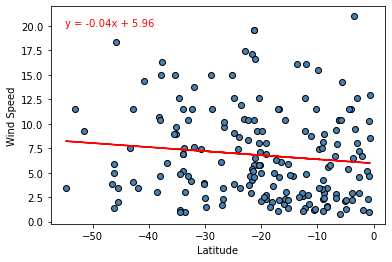

In [233]:
#Plot linear regression for Southern Hemisphere
# Calculate the correlation coefficient
corr_coef = np.corrcoef(sh["Lat"], sh["Wind Speed"])

#Calculate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh["Lat"], sh["Wind Speed"])
Lin_reg = (sh["Lat"]) * slope + intercept
print (f"The r-value is: {rvalue}")

#plot scatter
plt.scatter(sh["Lat"], sh["Wind Speed"], color= 'steelblue', edgecolors= 'black')
plt.plot((sh["Lat"]), Lin_reg, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Show regression equation
reg_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(reg_eq, xy=(-55,20), color="r", size=10)
plt.show()